In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import lzma, pickle
import scipy

load_dir = '../Data/'
save_dir = "../Plots/"

# Phase Diagram for $\overline{MO}_{t=0}$ in ($\delta$, $\rho$), varying $\lambda$

---

### Setting: 

- Graph: 3-RRG, $N=10000$
- Model: SI model
- Random initialization
- Observation type: Sensors

In [2]:
graph=r"rrg"
d=3
N=10000
init=r"rnd"

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
i_s = r"init"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"
mu_s = r"$\mu$"
D_s= r"$\Delta$"

se_s = "SE"
mse_s = "MSE"

In [3]:
file_name = "Fig10.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    data_frame = pickle.load(f)

o0t_s = r"$\widetilde{O}_{t=0}$"
mo0t_s = r"$\widetilde{MO}_{t=0}$"
do0t_s = r"$\widetilde{\delta O}_{t=0}$"

Rse_s = r"$R_{SE}$"
Rmse_s = r"$R_{MSE}$"
dRse_s = r"$\delta R_{SE}$"

dse_s = r"$\delta SE$"

In [4]:
data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
data_frame[r_s] = data_frame["M"]
data_frame[del_s] = data_frame["S"]

In [5]:
omo0_s = r"$\overline{MO}_{t=0}$"
oRmse_s = r"$\overline{R}_{MSE}$"
data_frame[omo0_s] = (data_frame[mo0t_s] - data_frame[r_s])/(1- data_frame[r_s])
data_frame[oRmse_s] = (data_frame[Rmse_s] - data_frame[r_s])/(1- data_frame[r_s])

data_frame[omo0_s] = data_frame.apply(lambda x: 1 if x[r_s]==1 else x[omo0_s], axis=1)
data_frame[oRmse_s] = data_frame.apply(lambda x: 1 if x[r_s]==1 else x[oRmse_s], axis=1)

In [6]:
df = data_frame[data_frame["init"]=="rnd"]
moT_s = r"$MO_{t=T}$"
moT_rnd_s = r"$MO_{t=T,RND}$"

mse_rnd_s = r"$MSE_{RND}$"
moTt_s = r"$\widetilde{MO}_{t=T}$"

oT_s = r"$O_{t=T}$"
oT_rnd_s = r"$O_{t=T,RND}$"
oTt_s = r"$\widetilde{O}_{t=T}$"

In [9]:
f_S = np.asarray(df.groupby(D_s).mean()["$f_S$"])

In [10]:
from matplotlib.lines import Line2D
palette_tab10 = sns.color_palette("tab10", 10)

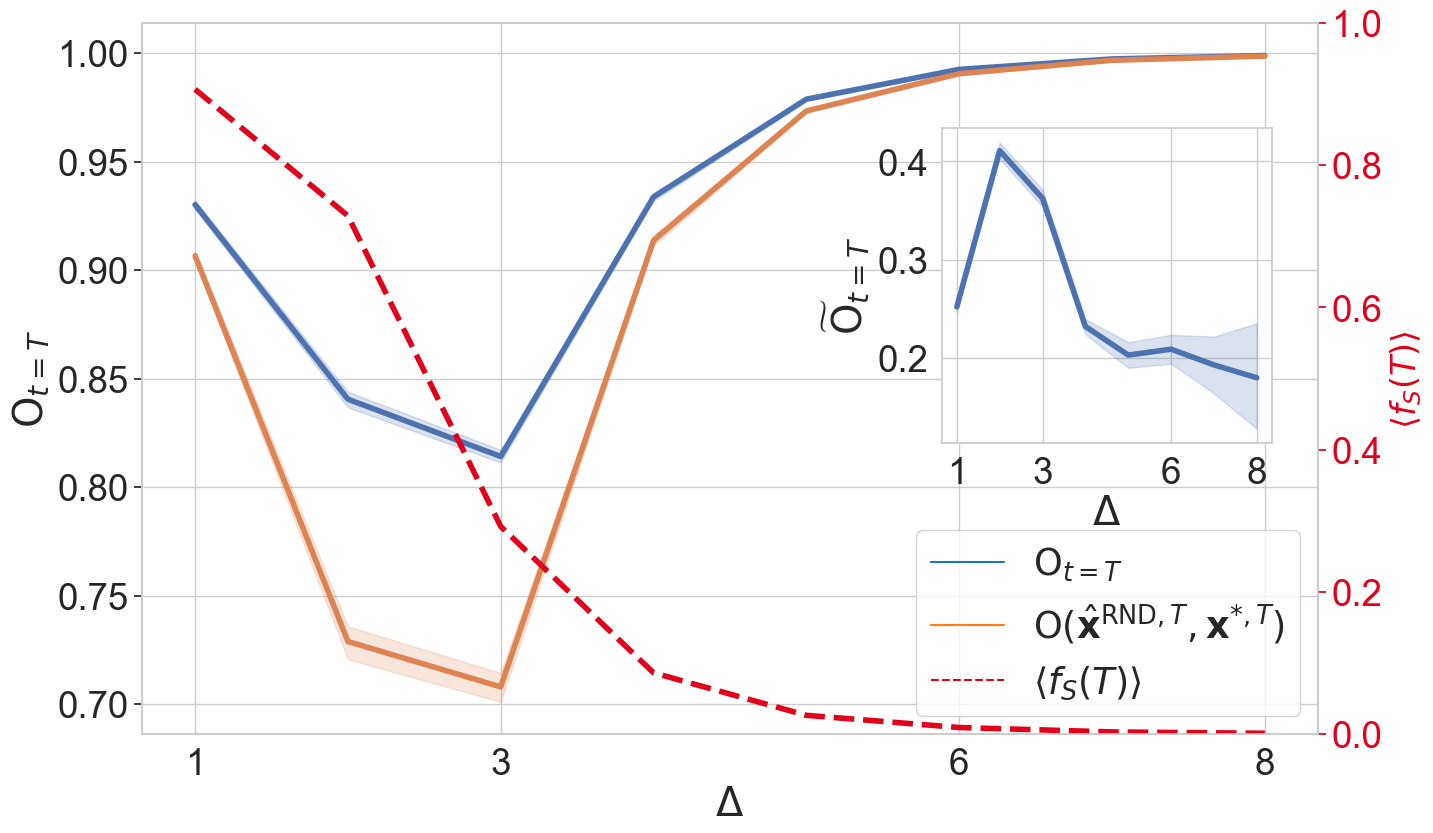

In [18]:
sns.set_theme(style="whitegrid", font_scale=2.4)
fig,ax = plt.subplots(1,1, figsize=(15,9),sharex=True,sharey=True)
#plt.suptitle(f"SENS, RRG, $N=10000$, $d={d}$, $\\delta=0.04$, $\\lambda=0.25$, $\\rho=0.2$")
#df = data_frame
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")
ax.set_xticks([1,3,6,8])
sns.lineplot(data = df[df["init"]=="rnd"], x = D_s, y=oT_s, markers=True,ax=ax, linewidth=4)
sns.lineplot(data = df[df["init"]=="rnd"], x = D_s, y=oT_rnd_s, markers=True,ax=ax, linewidth=4)
ax.set_ylabel(r"${\rm O}_{t=T}$")
ax2=ax.twinx()
ax2.tick_params(axis='y', colors='#e2001a')
# make a plot with different y-axis using second axis object
ax2.plot(np.arange(1,9), f_S,"--",color="#e2001a", linewidth=4)
ax2.set_ylabel(r"$\langle f_S(T) \rangle$",color="#e2001a",fontsize=24)
ax2.set_ylim([0,1])
plt.tight_layout()
ax2.grid(False)
line1 = Line2D([0], [0], label=r"${\rm O}_{t=T}$", color=palette_tab10[0])
line2 = Line2D([0], [0], label=r"${\rm O}(\hat{\mathbf{x}}^{{\rm RND},T}, \mathbf{x}^{*,T})$", color=palette_tab10[1])
line3 = Line2D([0], [0], label=r"$\langle f_S(T) \rangle$",ls="--", color="#e2001a")
ax.legend(handles=[line1,line2,line3],loc="lower right")#[0.69, 0.07])
ax3 = fig.add_axes([0.65, 0.47, 0.22, 0.35])
ax3.set_xticks([1,3,6,8])
sns.lineplot(data = df[df["init"]=="rnd"], x = D_s, y=oTt_s, markers=True,ax=ax3, linewidth=4)
ax3.set_ylabel(r"$\widetilde{\rm O}_{t=T}$")
#plt.legend()
fig.savefig(save_dir + f"Figure10.pdf")